<a href="https://colab.research.google.com/github/linearalgebra9292/line/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#numpy pandas drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#파일 업로드

In [2]:
from google.colab import files

files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [3]:
iris = pd.read_csv('Iris.csv')

m = len(iris)
print(m)

150


#특징추출

In [4]:
feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

iris2 = iris[feature]
iris2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#결측치 제거

In [5]:
rows_with_na = iris2[iris2.isna().any(axis=1)]

print(rows_with_na)
print(len(iris2))

iris2 = iris2.dropna(axis=0)
print(len(iris2))

Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []
150
150


#인공신경망-붓꽃 분류

0/1000 cost:1.3189365423157409 accuracy:33.33
100/1000 cost:0.6738475844344168 accuracy:66.67
200/1000 cost:0.5860474261648234 accuracy:67.33
300/1000 cost:0.5549994436953563 accuracy:68.00
400/1000 cost:0.5396818577144128 accuracy:68.67
500/1000 cost:0.5310931206686216 accuracy:70.00
600/1000 cost:0.5263813031395762 accuracy:72.00
700/1000 cost:0.5240955789545304 accuracy:79.33
800/1000 cost:0.5227418792375823 accuracy:82.67
900/1000 cost:0.5210125154629094 accuracy:83.33


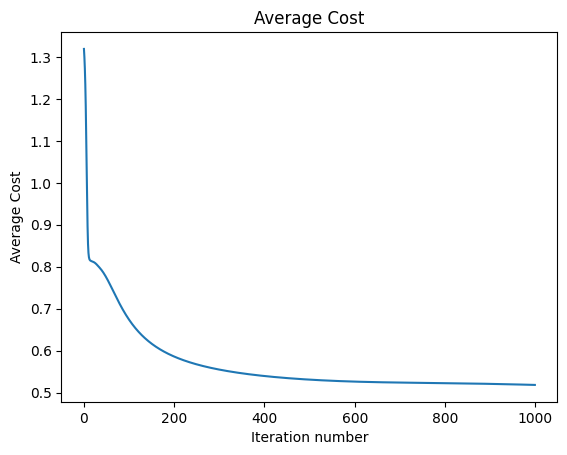

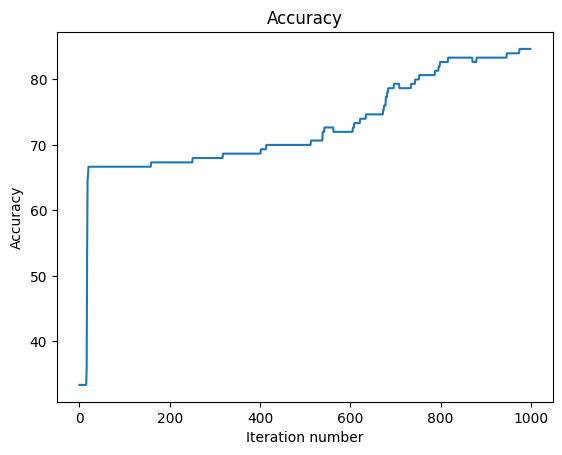

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def feed_forward(x, W1, W2, b1, b2):
    a1 = x
    z2 = np.dot(W1, a1) + b1
    a2 = sigmoid(z2)
    z3 = np.dot(W2, a2) + b2
    a3 = sigmoid(z3)
    return a1, a2, a3, z2, z3

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def encode(arr):
    unique_vals = np.unique(arr)
    num_classes = len(unique_vals)
    encoded = np.zeros((arr.size, num_classes))
    for i, val in enumerate(arr):
        encoded[i, val] = 1
    return encoded

x1 = iris2[['SepalLengthCm']]
x2 = iris2[['SepalWidthCm']]
x3 = iris2[['PetalLengthCm']]
x4 = iris2[['PetalWidthCm']]
y = iris2['Species'].map({'Iris-setosa': 2,'Iris-versicolor':1,'Iris-virginica':0})

node_size = {'input_layer_size': 4, 'hidden_layer_size': 5, 'output_layer_size': 3}
learning_rate = 0.9
max_iteration = 1000

W2 = np.random.random((node_size['output_layer_size'], node_size['hidden_layer_size']))
W1 = np.random.random((node_size['hidden_layer_size'], node_size['input_layer_size']))
b2 = np.random.random((node_size['output_layer_size'], 1))
b1 = np.random.random((node_size['hidden_layer_size'], 1))

x = np.c_[x1,x2,x3,x4]
X = x         #(150,4)
Y = encode(y) #(150,3)

count = 0
dataset_size = len(Y)
list_average_cost = []
list_accuracy = []

while count < max_iteration:
    dw2 = np.zeros((node_size['output_layer_size'], node_size['hidden_layer_size']))
    dw1 = np.zeros((node_size['hidden_layer_size'], node_size['input_layer_size']))
    db2 = np.zeros((node_size['output_layer_size'], 1))
    db1 = np.zeros((node_size['hidden_layer_size'], 1))
    average_cost = 0
    correct_predictions = 0

    for x, y in zip(X, Y):
        x = x[:, np.newaxis]
        y = y[:, np.newaxis]

        a1, a2, a3, z2, z3 = feed_forward(x, W1, W2, b1, b2)
        delta3 = -(y - a3) * sigmoid_derivative(z3)
        average_cost += np.linalg.norm((y - a3), 2) / dataset_size
        delta2 = np.dot(W2.T, delta3) * sigmoid_derivative(z2)

        dw2 += np.dot(delta3, a2.T)
        db2 += delta3
        dw1 += np.dot(delta2, a1.T)
        db1 += delta2

        if np.argmax(a3) == np.argmax(y):
            correct_predictions += 1

    accuracy = (correct_predictions / dataset_size) * 100
    list_accuracy.append(accuracy)

    W2 -= learning_rate * (dw2 / dataset_size)
    b2 -= learning_rate * (db2 / dataset_size)
    W1 -= learning_rate * (dw1 / dataset_size)
    b1 -= learning_rate * (db1 / dataset_size)

    list_average_cost.append(average_cost)
    if count % 100 == 0:
        print('{}/{} cost:{} accuracy:{:.2f}'.format(count, max_iteration, average_cost, accuracy))

    count += 1

# 그래프 출력
plt.plot(list_average_cost)
plt.title('Average Cost')
plt.xlabel('Iteration number')
plt.ylabel('Average Cost')
plt.show()

plt.plot(list_accuracy)
plt.title('Accuracy')
plt.xlabel('Iteration number')
plt.ylabel('Accuracy')
plt.show()